In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

In [3]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [4]:
print(train_df.shape)
print(test_df.shape)

(59598, 24)
(14900, 24)


In [15]:
employee_df = pd.concat([train_df,test_df], ignore_index=True)

In [16]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               74498 non-null  int64 
 1   Age                       74498 non-null  int64 
 2   Gender                    74498 non-null  object
 3   Years at Company          74498 non-null  int64 
 4   Job Role                  74498 non-null  object
 5   Monthly Income            74498 non-null  int64 
 6   Work-Life Balance         74498 non-null  object
 7   Job Satisfaction          74498 non-null  object
 8   Performance Rating        74498 non-null  object
 9   Number of Promotions      74498 non-null  int64 
 10  Overtime                  74498 non-null  object
 11  Distance from Home        74498 non-null  int64 
 12  Education Level           74498 non-null  object
 13  Marital Status            74498 non-null  object
 14  Number of Dependents  

In [17]:
employee_df.head(10)

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,22,Associate Degree,Married,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,No,21,Master’s Degree,Divorced,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,No,11,Bachelor’s Degree,Married,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,No,27,High School,Single,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,71,High School,Divorced,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
5,24368,38,Female,3,Technology,9977,Fair,High,Below Average,3,No,37,Bachelor’s Degree,Married,0,Mid,Medium,47,No,No,Yes,Fair,High,Left
6,64970,47,Male,23,Education,3681,Fair,High,High,1,Yes,75,High School,Divorced,3,Entry,Small,93,No,No,No,Good,Medium,Left
7,36999,48,Male,16,Finance,11223,Excellent,Very High,High,2,No,5,Master’s Degree,Married,4,Entry,Medium,88,No,No,No,Excellent,Low,Stayed
8,32714,57,Male,44,Education,3773,Good,Medium,High,1,Yes,39,High School,Married,4,Entry,Medium,75,No,No,No,Fair,Medium,Stayed
9,15944,24,Female,1,Healthcare,7319,Poor,High,Average,1,Yes,57,PhD,Single,4,Entry,Large,45,No,No,Yes,Good,Low,Left


In [19]:
employee_df= employee_df.sort_values(by= ["Employee ID"], ascending= True).reset_index(drop= True)
employee_df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,1,56,Male,41,Education,5209,Fair,Very High,Average,0,No,98,Associate Degree,Married,0,Entry,Small,86,No,No,No,Good,Low,Stayed
1,2,46,Female,22,Technology,9099,Fair,Medium,Average,0,No,13,Bachelor’s Degree,Married,0,Entry,Medium,93,No,No,No,Good,High,Left
2,3,32,Male,16,Education,4239,Good,High,Below Average,0,No,54,High School,Single,0,Mid,Small,56,No,No,No,Poor,Low,Stayed
3,4,25,Female,17,Finance,6834,Fair,High,Average,0,Yes,62,PhD,Single,2,Entry,Medium,26,No,No,No,Poor,High,Left
4,5,38,Female,2,Finance,12176,Fair,Very High,Below Average,0,No,75,Bachelor’s Degree,Married,5,Entry,Small,66,No,No,No,Good,Medium,Left


In [20]:
employee_df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832935,49.991584,1.650326,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995289,28.513611,1.553633,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


### Gender Distribution of Employees

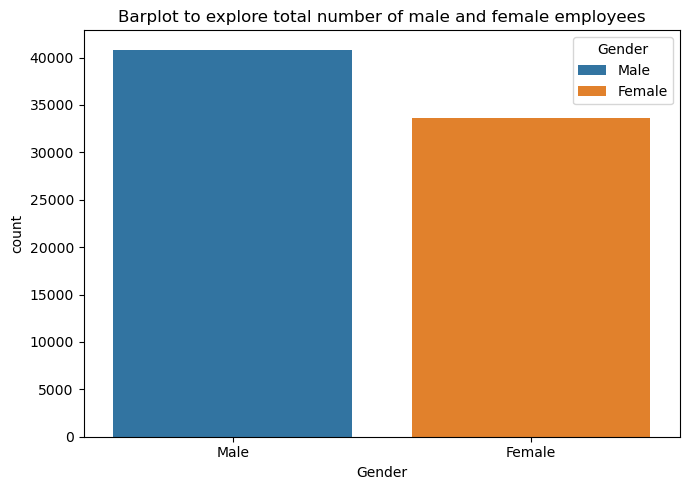

In [38]:
gender_df = employee_df["Gender"].value_counts().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(data= gender_df, x= "Gender", y= "count", hue="Gender", legend=True)
plt.title("Barplot to explore total number of male and female employees")
plt.tight_layout()
plt.show()

This shows company has higher number of male than female. 

### Age Distribution of Employee

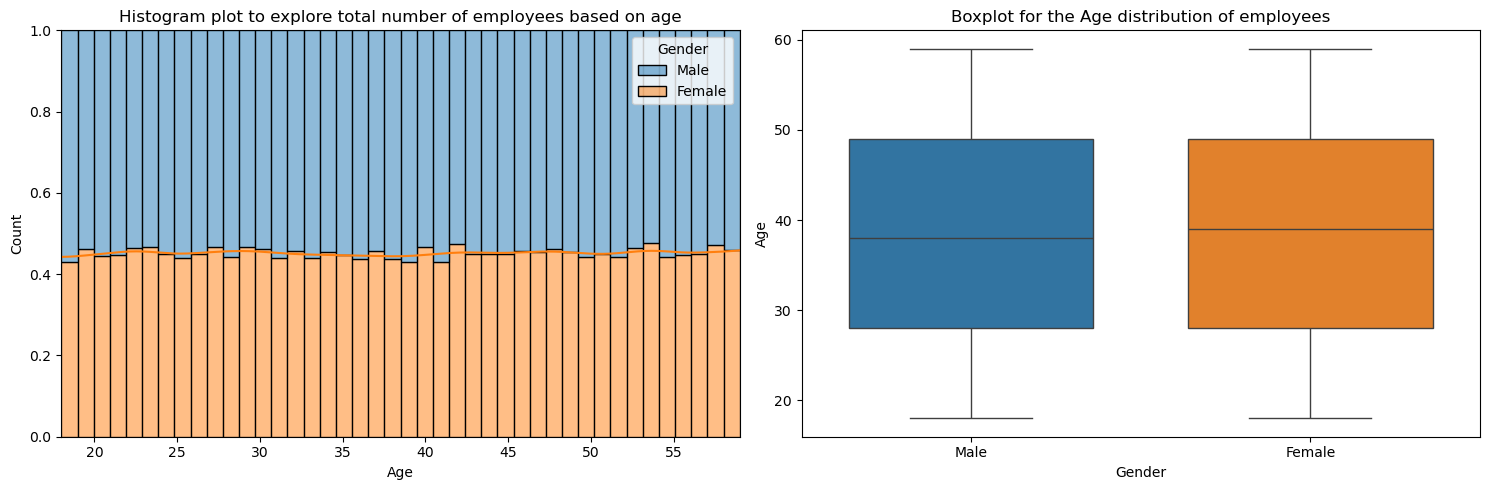

In [ ]:
fig, axs= plt.subplots(1, 2, figsize= (15, 5))
sns.histplot(data= employee_df, x= "Age", hue= "Gender", kde= True, legend= True,  multiple="stack", ax= axs[0])
axs[0].set_title("Histogram plot to explore total number of employees based on age")

sns.boxplot(data= employee_df, x= "Gender", hue="Gender", y= "Age", gap=0.1, ax= axs[1])
axs[1].set_title("Boxplot for the Age distribution of employees")
plt.tight_layout()
plt.show()


All agees have almost equal number of employees. 

### Years at Company

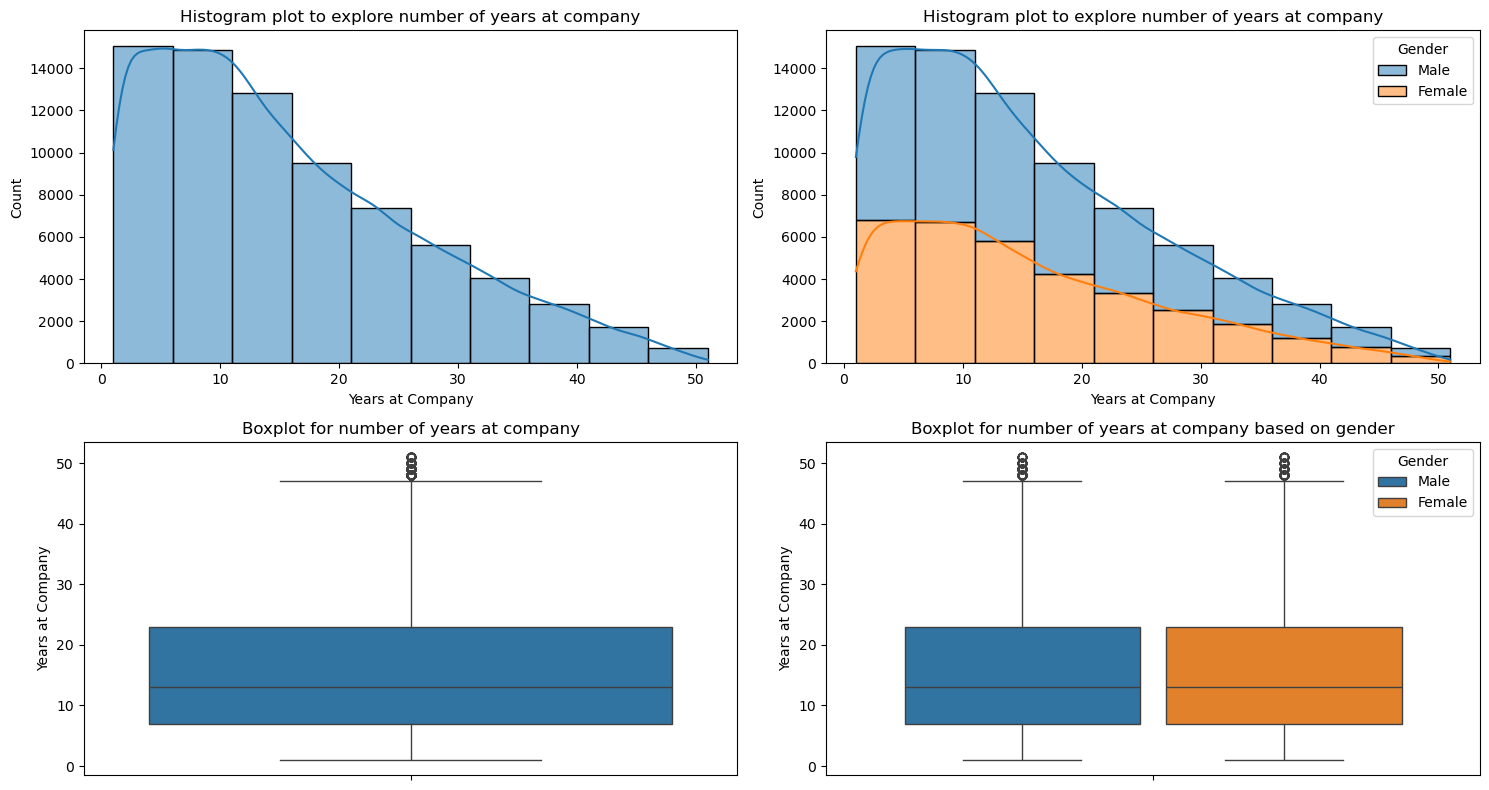

In [134]:
fig, axs= plt.subplots(2, 2, figsize= (15, 8))
sns.histplot(data= employee_df, x= "Years at Company", bins= 10, kde= True, legend= True, ax= axs[0, 0])
axs[0, 0].set_title("Histogram plot to explore number of years at company")
sns.histplot(data= employee_df, x= "Years at Company", bins= 10, hue= "Gender", kde= True, legend= True,  multiple="stack", ax= axs[0, 1])
axs[0, 1].set_title("Histogram plot to explore number of years at company")

sns.boxplot(data= employee_df, y= "Years at Company", ax= axs[1, 0])
axs[1, 0].set_title("Boxplot for number of years at company")
sns.boxplot(data= employee_df, hue="Gender", y= "Years at Company", gap=0.1, ax= axs[1, 1])
axs[1, 1].set_title("Boxplot for number of years at company based on gender")

plt.tight_layout()
plt.show()


It seems there is outlier for number of years at company for both male and female records. 
It shows some of employes works for larger number of years at the company. 

### Job Role

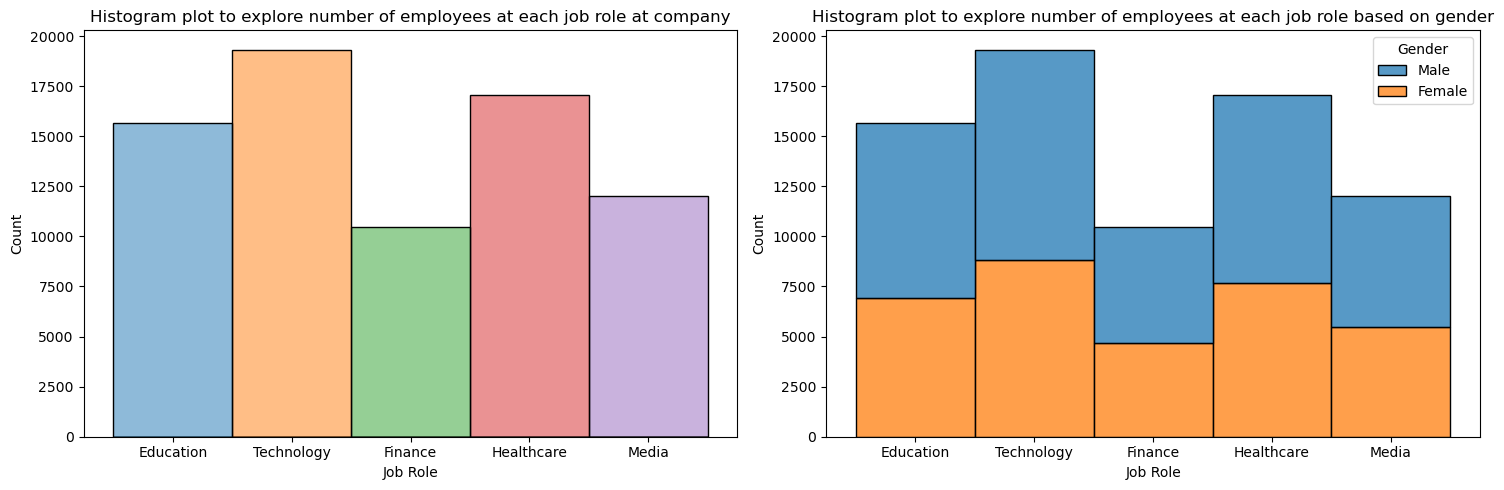

In [152]:
fig, axs= plt.subplots(1, 2, figsize= (15, 5))
sns.histplot(data= employee_df, x= "Job Role", hue= "Job Role", kde= True, legend= False, ax= axs[0])
axs[0].set_title("Histogram plot to explore number of employees at each job role at company")
sns.histplot(data= employee_df, x= "Job Role", hue= "Gender", ax= axs[1], multiple= "stack")
axs[1].set_title("Histogram plot to explore number of employees at each job role based on gender")

plt.tight_layout()
plt.show()

Technology has highest number of employee and finance has lowest number of employees. 

### Monthly Income